# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [1]:
import os
import glob
import pandas as pd
os.getcwd()

'C:\\Users\\User\\PycharmProjects\\pythonProject\\venv\\Scripts'

In [2]:
os.chdir("C:\\Users\\User\\Desktop\\Data-Analysis-Project-main") #Current working directory that contains your dataset and code file
os.getcwd()

'C:\\Users\\User\\Desktop\\Data-Analysis-Project-main'

#### To-Do - Use glob to match the pattern "csv"

In [3]:
from os import listdir

def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [filename for filename in filenames if filename.endswith(suffix)]



filenames = find_csv_filenames("C:\\Users\\User\\Desktop\\Data-Analysis-Project-main")
for names in filenames:
  print(names)

Abuja_Branch.csv
All_Branches_Data.csv
Lagos_Branch.csv
Port_Harcourt_Branch.csv


In [4]:
filenames

['Abuja_Branch.csv',
 'All_Branches_Data.csv',
 'Lagos_Branch.csv',
 'Port_Harcourt_Branch.csv']

In [5]:
for name in filenames:
    print(name)

Abuja_Branch.csv
All_Branches_Data.csv
Lagos_Branch.csv
Port_Harcourt_Branch.csv


#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [6]:
#[Write your Code Here]
dataframes = [pd.read_csv(f) for f in filenames]
Dataframes = pd.concat([dataframes[0], dataframes[1], dataframes[2]], ignore_index=True)
#Export to csv
#[Write your Code Here]
Dataframes.to_csv("All_Branches_Data.csv")

#### To-Do -Read the CSV file using `pd.read_csv` method

In [7]:
data = pd.read_csv("All_Branches_Data.csv")

## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')  
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [9]:
#[Write your Code Here]
data.head()

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Unnamed: 0.1,Unnamed: 0.1.1
0,0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9,NaN,NaN
1,1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5,NaN,NaN
2,2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8,NaN,NaN
3,3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5,NaN,NaN
4,4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4,NaN,NaN


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [10]:
#[Write your Code Here]
data.shape

(2344, 20)

#### To-Do - Generate the names of the columns using the columns attribute.

In [11]:
#[Write your Code Here]
data.columns

Index(['Unnamed: 0', 'Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Unnamed: 0.1', 'Unnamed: 0.1.1'],
      dtype='object')

#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [12]:
#[Write your Code Here]
data.describe()

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Unnamed: 0.1,Unnamed: 0.1.1
count,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2.344000e+03,2344.000000,2344.000000,1672.000000,1000.000000
mean,1171.500000,19947.573891,5.489761,5468.767679,114844.121263,109375.353584,4.761905e+00,5468.767679,6.944667,835.500000,499.500000
std,676.798838,9465.915672,2.895075,4126.173789,86649.649578,82523.475788,7.502953e-16,4126.173789,1.721439,482.809141,288.819436
min,0.000000,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.000000,0.000000,0.000000
25%,585.750000,11767.500000,3.000000,2154.240000,45239.040000,43084.800000,4.761905e+00,2154.240000,5.500000,417.750000,249.750000
50%,1171.500000,19692.000000,5.000000,4315.140000,90617.940000,86302.800000,4.761905e+00,4315.140000,6.900000,835.500000,499.500000
75%,1757.250000,27734.400000,8.000000,7979.040000,167559.840000,159580.800000,4.761905e+00,7979.040000,8.400000,1253.250000,749.250000
max,2343.000000,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.000000,1671.000000,999.000000


#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [13]:
#[Write your Code Here]
data.isnull().sum()

Unnamed: 0                    0
Invoice ID                    0
Branch                        0
City                          0
Customer type                 0
Gender                        0
Product line                  0
Unit price                    0
Quantity                      0
Tax 5%                        0
Total                         0
Date                          0
Time                          0
Payment                       0
cogs                          0
gross margin percentage       0
gross income                  0
Rating                        0
Unnamed: 0.1                672
Unnamed: 0.1.1             1344
dtype: int64

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [14]:
#[Write your Code Here]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2344 non-null   int64  
 1   Invoice ID               2344 non-null   object 
 2   Branch                   2344 non-null   object 
 3   City                     2344 non-null   object 
 4   Customer type            2344 non-null   object 
 5   Gender                   2344 non-null   object 
 6   Product line             2344 non-null   object 
 7   Unit price               2344 non-null   float64
 8   Quantity                 2344 non-null   int64  
 9   Tax 5%                   2344 non-null   float64
 10  Total                    2344 non-null   float64
 11  Date                     2344 non-null   object 
 12  Time                     2344 non-null   object 
 13  Payment                  2344 non-null   object 
 14  cogs                    

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [15]:
#[Write your Code Here]
data['Date'] = pd.to_datetime(data['Date'])

#### To-Do - Check the datatype to confirm if it's in `datetime`

In [16]:
#[Write your Code Here]
data['Date'].dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               2344 non-null   int64         
 1   Invoice ID               2344 non-null   object        
 2   Branch                   2344 non-null   object        
 3   City                     2344 non-null   object        
 4   Customer type            2344 non-null   object        
 5   Gender                   2344 non-null   object        
 6   Product line             2344 non-null   object        
 7   Unit price               2344 non-null   float64       
 8   Quantity                 2344 non-null   int64         
 9   Tax 5%                   2344 non-null   float64       
 10  Total                    2344 non-null   float64       
 11  Date                     2344 non-null   datetime64[ns]
 12  Time                     2344 non-

#### To-Do - Repeat the two steps above to the `time` column

In [17]:
#[Write your Code Here]
data['Time'] = pd.to_datetime(data['Time'])

## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [18]:
#[Write your Code Here]
data['Day'] = data['Date'].dt.day

#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [19]:
#[Write your Code Here]
data['Month'] = data['Date'].dt.month

#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [20]:
#[Write your Code Here]
data['Year'] = data['Date'].dt.year

#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [21]:
#[Write your Code Here]
data['Hour'] = data['Time'].dt.hour

#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [22]:
#[Write your Code Here]
data['Hour'].nunique()

11

In [23]:
#[Write your Code Here]
data['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [24]:
#Uncomment the code and Run it
categorical_columns = [col for col in data.columns if data[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [25]:
#Example - Uncomment the Code and Run it
data['Invoice ID'].unique().tolist()
print("Total Number of unique values in the Invoice ID Column : {}". format(len(data['Invoice ID'].unique().tolist())))

Total Number of unique values in the Invoice ID Column : 1000


In [26]:
print(data['City'].unique().tolist())
print("Total Number of unique values in the City Column : {}". format(len(data['City'].unique().tolist())))

['Abuja', 'Lagos', 'Port Harcourt']
Total Number of unique values in the City Column : 3


In [27]:
print(data['Customer type'].unique().tolist())
print("Total Number of unique values in the Customer type Column : {}". format(len(data['Customer type'].unique().tolist())))

['Member', 'Normal']
Total Number of unique values in the Customer type Column : 2


In [28]:
print(data['Product line'].unique().tolist())
print("Total Number of unique values in the Product line Column : {}". format(len(data['Product line'].unique().tolist())))

['Food and beverages', 'Fashion accessories', 'Electronic accessories', 'Sports and travel', 'Home and lifestyle', 'Health and beauty']
Total Number of unique values in the Product line Column : 6


In [29]:
print(data['Gender'].unique().tolist())
print("Total Number of unique values in the Gender Column : {}". format(len(data['Gender'].unique().tolist())))

['Female', 'Male']
Total Number of unique values in the Gender Column : 2


In [30]:
print(data['Payment'].unique().tolist())
print("Total Number of unique values in the Payment Column : {}". format(len(data['Payment'].unique().tolist())))

['Card', 'Epay', 'Cash']
Total Number of unique values in the Payment Column : 3


#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [31]:
#Example
data['Branch'].value_counts()

A    1020
B     996
C     328
Name: Branch, dtype: int64

In [32]:
data[categorical_columns].value_counts()

Invoice ID   Branch  City           Customer type  Gender  Product line            Payment
898-04-2717  A       Lagos          Normal         Male    Fashion accessories     Epay       3
421-95-9805  A       Lagos          Normal         Female  Electronic accessories  Card       3
433-75-6987  B       Abuja          Member         Female  Health and beauty       Epay       3
431-66-2305  B       Abuja          Normal         Female  Electronic accessories  Card       3
430-60-3493  A       Lagos          Member         Female  Home and lifestyle      Cash       3
                                                                                             ..
725-96-3778  C       Port Harcourt  Member         Female  Home and lifestyle      Cash       1
380-94-4661  C       Port Harcourt  Member         Male    Electronic accessories  Card       1
382-25-8917  C       Port Harcourt  Normal         Male    Fashion accessories     Cash       1
725-54-0677  C       Port Harcourt  Member   

In [33]:
data.drop(columns='Unnamed: 0', inplace =True)

## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [34]:
#[Write your Code Here]
data.groupby('City').agg(['sum', 'mean'])

Unit price               Quantity                Tax 5%  \
                      sum          mean      sum      mean         sum   
City                                                                     
Abuja          19957190.4  20037.339759     5460  5.481928  5461594.56   
Lagos          20115529.2  19721.107059     5577  5.467647  5461733.34   
Port Harcourt   6684393.6  20379.248780     1831  5.582317  1895463.54   

                                   Total                        cogs  \
                      mean           sum           mean          sum   
City                                                                   
Abuja          5483.528675  1.146935e+08  115154.102169  109231891.2   
Lagos          5354.640529  1.146964e+08  112447.451118  109234666.8   
Port Harcourt  5778.852256  3.980473e+07  121355.897378   37909270.8   

                              ... Unnamed: 0.1.1           Day             \
                        mean  ...            sum   mean    sum       mean   
City                          ...                                           
Abuja          109670.573494  ...        54946.0  165.5  15204  15.265060   
Lagos          107092.810588  ...       170510.0  501.5  15696  15.388235   
Port Harcourt  115577.045122  ...       274044.0  835.5   4956  15.109756   

              Month               Year         Hour             
                sum      mean      sum  mean    sum       mean  
City                                                            
Abuja          1995  2.003012  2010924  2019  15087  15.147590  
Lagos          2064  2.023529  2059380  2019  14961  14.667647  
Port Harcourt   640  1.951220   662232  2019   4894  14.920732  

[3 rows x 28 columns]

#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [35]:
#[Write your Code Here]
data.groupby("City")['gross income'].sum()

City
Abuja            5461594.56
Lagos            5461733.34
Port Harcourt    1895463.54
Name: gross income, dtype: float64

In [36]:
# [Write your Answer Here]
data.groupby("City")['gross income'].sum().max()

5461733.339999996

In [37]:
# Optional - You can explore other columns such as "Unit Price", "Quantity" etc. 

In [99]:
data.groupby("City")['Unit price'].sum().max()

20115529.200000025

In [101]:
data.groupby("City")['Quantity'].sum().max()

5577

## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### Using `barplot`, determine the branch with the highest sales record.

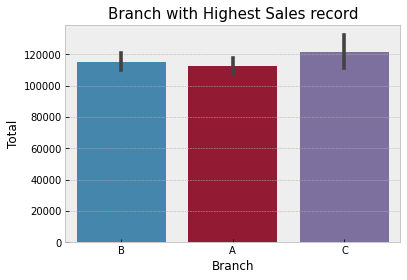

In [67]:
#[Write your Code Here]
sns.barplot(x='Branch', y = 'Total', data=data)
plt.title("Branch with Highest Sales record", fontsize=15)
plt.show()

#### Using `barplot`, determine the branch with the highest sales record base on Gender 

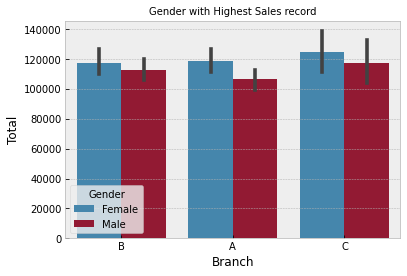

In [68]:
sns.barplot(x='Branch', y = 'Total', hue ='Gender', data=data)
plt.title("Gender with Highest Sales record", fontsize=10)
plt.show()

#### Using `barplot`, determine the branch with the highest sales record base on Customer type

Text(0.5, 1.0, 'Customer Type with highest Sales in different Branch')

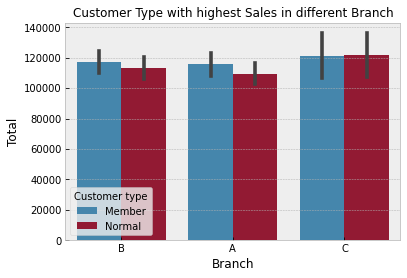

In [41]:
sns.barplot(x='Branch', y = 'Total', hue ='Customer type', data=data)
plt.title("Customer Type with highest Sales in different Branch", fontsize=12)

#### Using `countplot`, determine the most used payment method 

Text(0.5, 1.0, 'Most Used Payment Method')

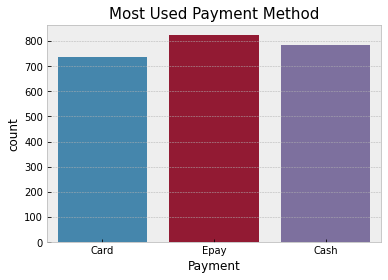

In [69]:
sns.countplot('Payment', data=data)
plt.title("Most Used Payment Method", fontsize=15)

#### Using `barplot`, determine the city with the most sales

Text(0.5, 1.0, 'City with the most sales')

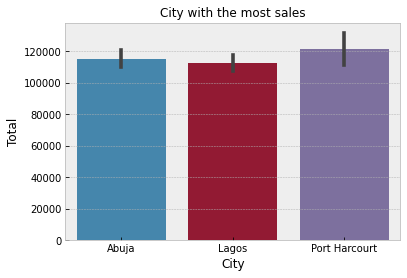

In [72]:
sns.barplot(x='City', y = 'Total', data=data)
plt.title("City with the most sales", fontsize=12)

#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

Text(0.5, 1.0, 'Showing Highest & lowest sold product')

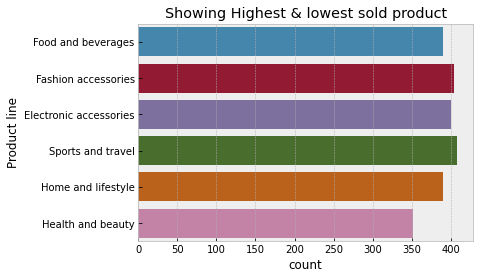

In [73]:
#[Write your Code Here]
sns.countplot(y = "Product line", data=data)
plt.title("Showing Highest & lowest sold product")

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

Text(0.5, 1.0, 'Payment channel used by most customer for each product')

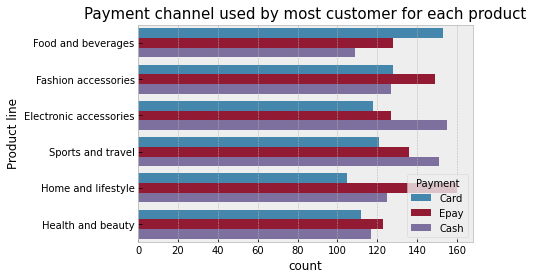

In [74]:
#[Write your Code Here]
sns.countplot(y='Product line', data=data, hue='Payment')
plt.title("Payment channel used by most customer for each product", fontsize=15)

#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

Text(0.5, 1.0, 'Payment method used in different branches')

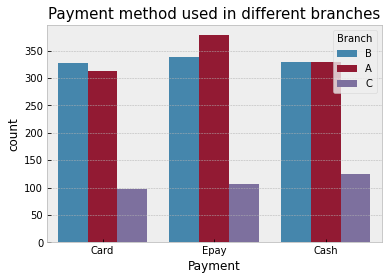

In [75]:
#[Write your Code Here]
sns.countplot('Payment', hue='Branch', data=data)
plt.title("Payment method used in different branches", fontsize=15)

#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

Text(0.5, 1.0, 'Showing different branches and thier rating level')

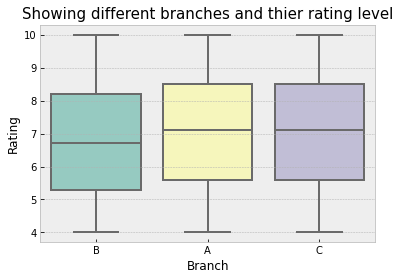

In [48]:
#[Write your Code Here]
sns.boxplot(x="Branch", y="Rating", data=data, palette="Set3")
plt.title("Showing different branches and thier rating level", fontsize=15)

#[Write your answer here]
From the boxplot shown above, the lowest rating Branch is Branch B, The `mean` is about `6.8` points

#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

Text(0.5, 1.0, 'Product_line and Quantity')

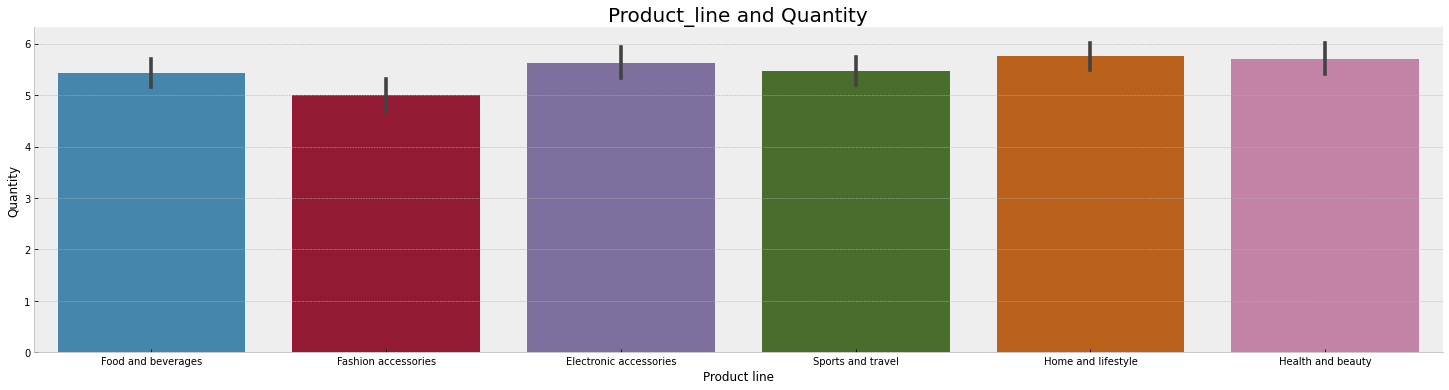

In [95]:
sns.catplot(x = 'Product line', y = 'Quantity', data=data, aspect=4.0, kind='bar')
plt.title("Product_line and Quantity", fontsize=20)

Text(0.5, 1.0, 'Product_line and Quantity')

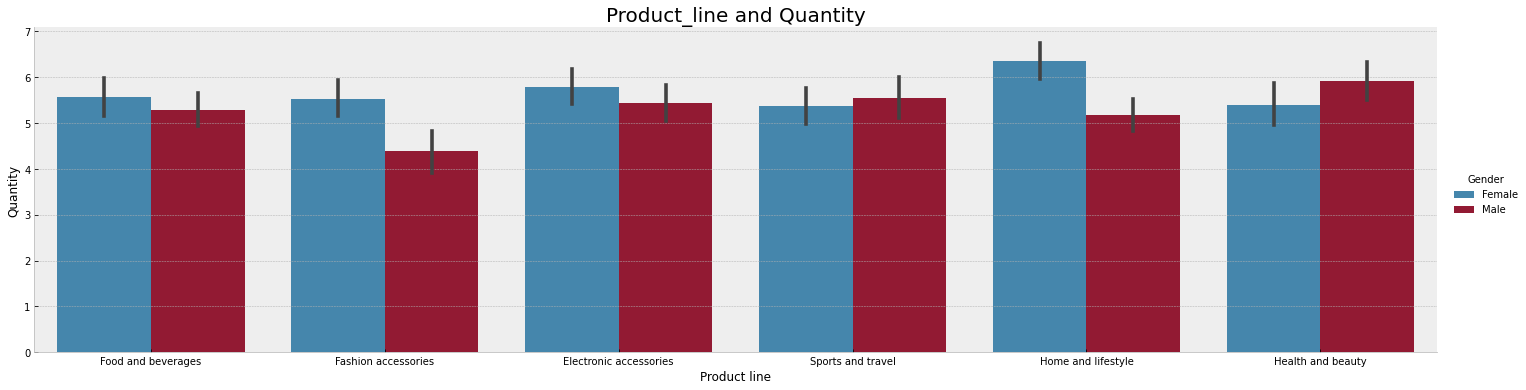

In [77]:
#[Write your Code Here]
sns.catplot(x = 'Product line', y = 'Quantity', hue='Gender', data=data, aspect=4.0, kind='bar')
plt.title("Product_line and Quantity", fontsize=20)

Text(0.5, 1.0, 'Product_line and Total')

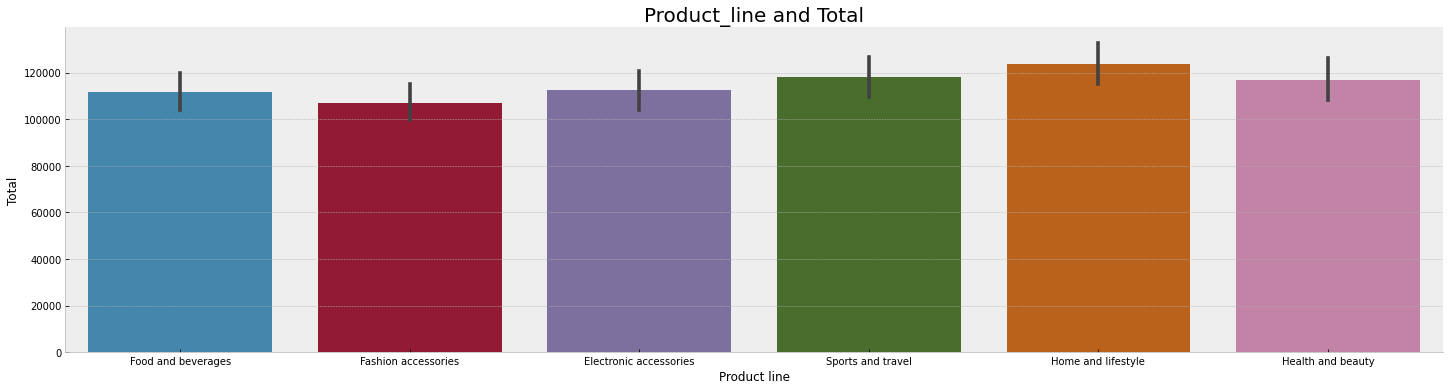

In [96]:
sns.catplot(x = 'Product line', y = 'Total', data=data, aspect=4.0, kind='bar')
plt.title("Product_line and Total", fontsize=20)

Text(0.5, 1.0, 'Product_line and Total')

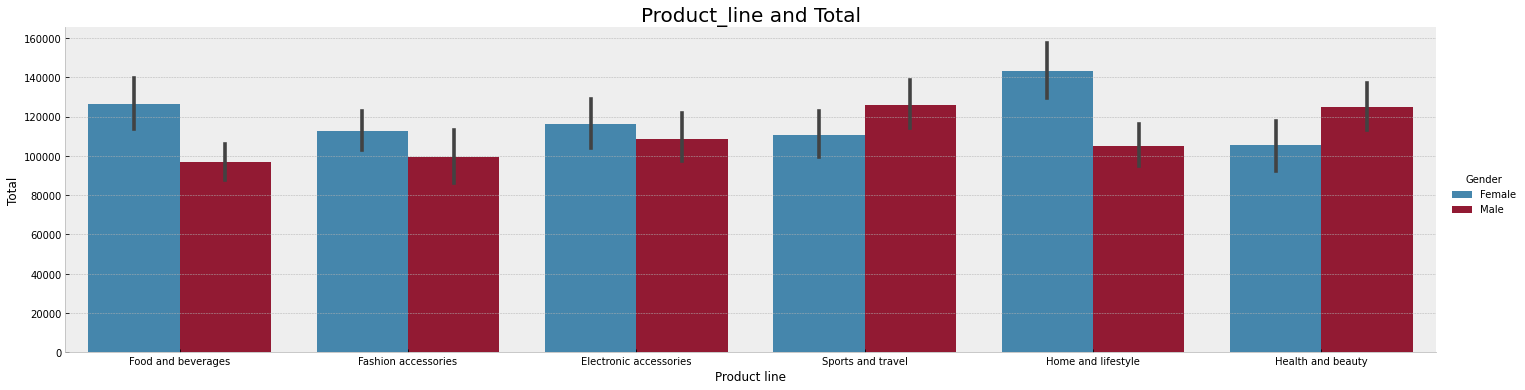

In [78]:
#[Write your Code Here]
sns.catplot(x = 'Product line', y = 'Total', hue='Gender', data=data, aspect=4.0, kind='bar')
plt.title("Product_line and Total", fontsize=20)

From the chart above, Female spend more on `Food/beverages, fashion accessories, Electronic accessories, and  Home/lifestyle` than male
while Male purchased more product of `Sports and travel and Health/Beauty` than Female

#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

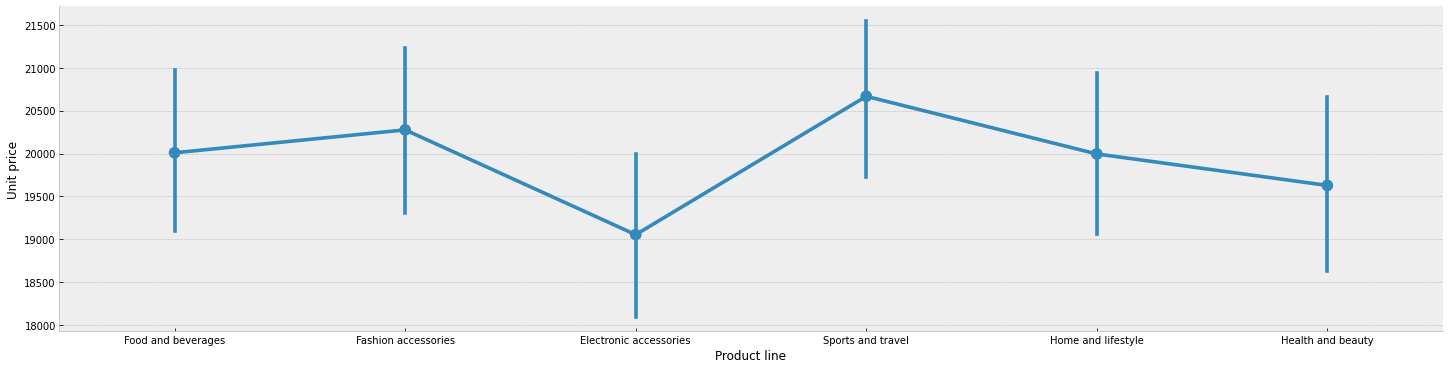

In [79]:
#[Write your Code Here]
sns.catplot(x='Product line', y = 'Unit price', data=data, aspect=4.0, kind='point')

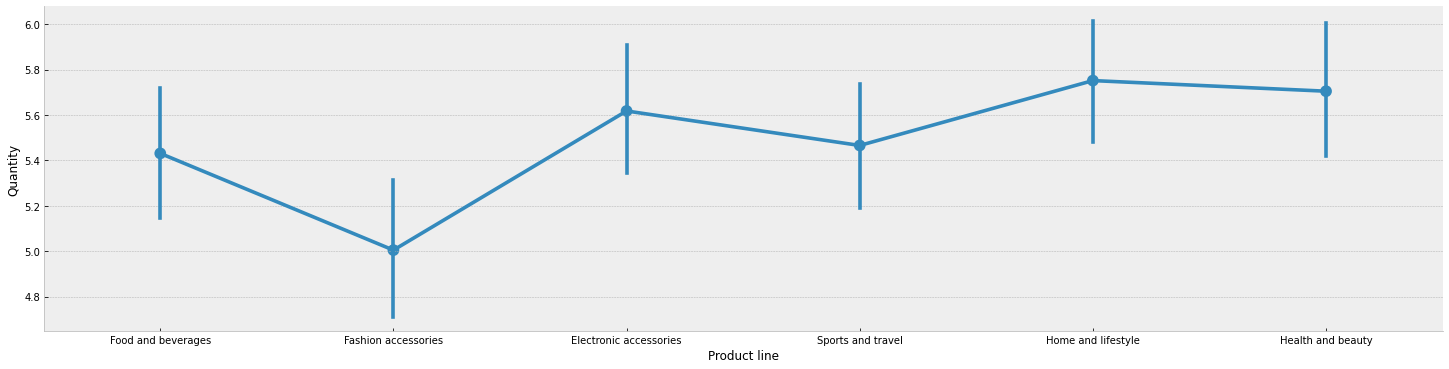

In [80]:
sns.catplot(x='Product line', y = 'Quantity', data=data, aspect=4.0, kind='point')

In [54]:
#[Write your Code Here]

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


## Time series

In [55]:
df = pd.read_csv("All_Branches_Data.csv", parse_dates=['Date'], index_col='Date')

In [56]:
df.head()

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Unnamed: 0.1,Unnamed: 0.1.1
Date,,,,,,,,,,,,,,,,,,,
2019-02-20,0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,13:27,Card,59227.2,4.761905,2961.36,5.9,NaN,NaN
2019-02-06,1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,18:07,Epay,20851.2,4.761905,1042.56,4.5,NaN,NaN
2019-03-09,2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,17:03,Cash,36734.4,4.761905,1836.72,6.8,NaN,NaN
2019-01-15,3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,16:19,Cash,202435.2,4.761905,10121.76,4.5,NaN,NaN
2019-03-11,4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,15:30,Epay,29016.0,4.761905,1450.80,4.4,NaN,NaN


In [82]:
df.tail()

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Unnamed: 0.1,Unnamed: 0.1.1
Date,,,,,,,,,,,,,,,,,,,
2019-03-22,2339,886-18-2897,A,Lagos,Normal,Female,Food and beverages,20361.6,5,5090.40,106898.40,19:06,Card,101808.0,4.761905,5090.40,4.5,NaN,NaN
2019-03-10,2340,745-74-0715,A,Lagos,Normal,Male,Electronic accessories,20890.8,2,2089.08,43870.68,20:46,Epay,41781.6,4.761905,2089.08,8.8,NaN,NaN
2019-02-09,2341,727-02-1313,A,Lagos,Member,Male,Food and beverages,11462.4,1,573.12,12035.52,13:22,Cash,11462.4,4.761905,573.12,7.7,NaN,NaN
2019-02-22,2342,347-56-2442,A,Lagos,Normal,Male,Home and lifestyle,23695.2,1,1184.76,24879.96,15:33,Cash,23695.2,4.761905,1184.76,4.1,NaN,NaN
2019-02-18,2343,849-09-3807,A,Lagos,Member,Female,Fashion accessories,31802.4,7,11130.84,233747.64,13:28,Cash,222616.8,4.761905,11130.84,6.6,NaN,NaN


In [91]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace=True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-02-20,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,13:27,Card,59227.2,4.761905,2961.36,5.9
2019-02-06,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,18:07,Epay,20851.2,4.761905,1042.56,4.5
2019-03-09,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,17:03,Cash,36734.4,4.761905,1836.72,6.8
2019-01-15,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,16:19,Cash,202435.2,4.761905,10121.76,4.5
2019-03-11,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [57]:
df.index

DatetimeIndex(['2019-02-20', '2019-02-06', '2019-03-09', '2019-01-15',
               '2019-03-11', '2019-03-05', '2019-03-15', '2019-02-08',
               '2019-01-25', '2019-02-25',
               ...
               '2019-03-25', '2019-02-11', '2019-03-04', '2019-01-23',
               '2019-03-14', '2019-03-22', '2019-03-10', '2019-02-09',
               '2019-02-22', '2019-02-18'],
              dtype='datetime64[ns]', name='Date', length=2344, freq=None)

In [81]:
df.Total.resample('M').mean() 

Date
2019-01-31    118820.501379
2019-02-28    114645.608632
2019-03-31    111091.903524
Freq: M, Name: Total, dtype: float64

In [84]:
y = df['Total'].resample('MS').mean()
y

Date
2019-01-01    118820.501379
2019-02-01    114645.608632
2019-03-01    111091.903524
Freq: MS, Name: Total, dtype: float64

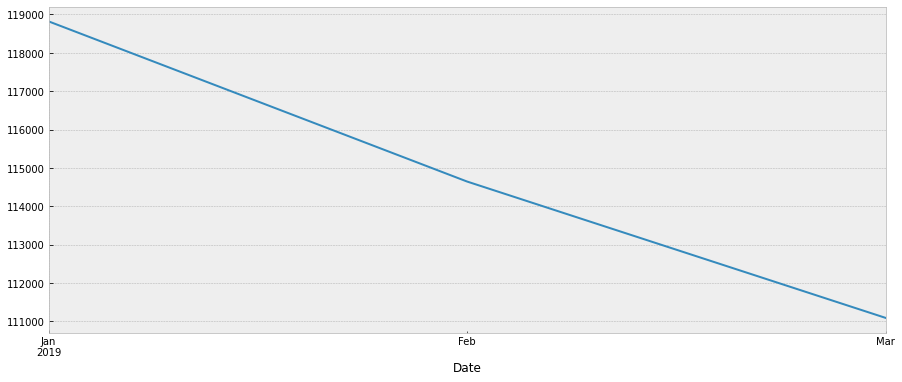

In [85]:
y.plot(figsize=(15, 6))
plt.show()

<AxesSubplot:xlabel='Date'>

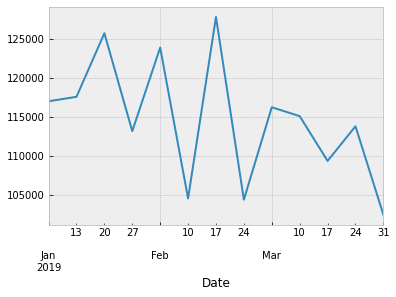

In [59]:
df.Total.resample('W').mean().plot()

<AxesSubplot:xlabel='Date'>

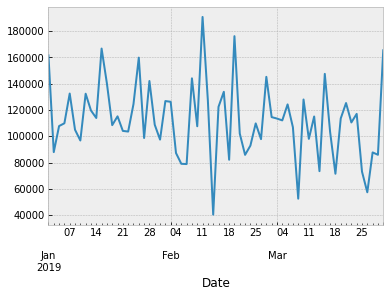

In [60]:
df.Total.resample('B').mean().plot()

Text(0.5, 1.0, 'Monthly Average sales')

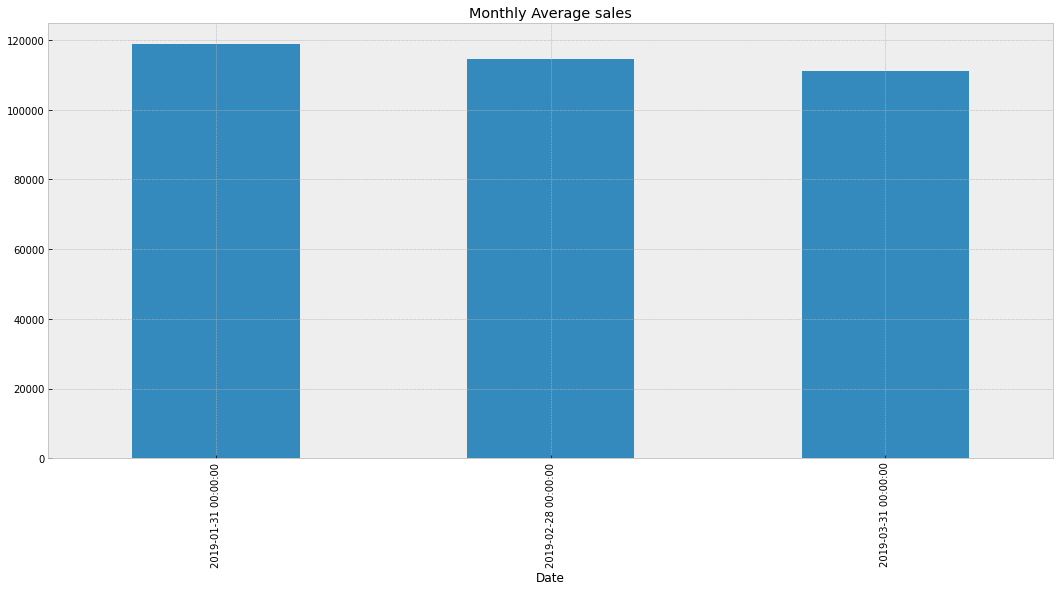

In [94]:
df.Total.resample('M').mean().plot(kind='bar')
plt.title('Monthly Average sales')

Text(0.5, 1.0, 'Monthly Total sales')

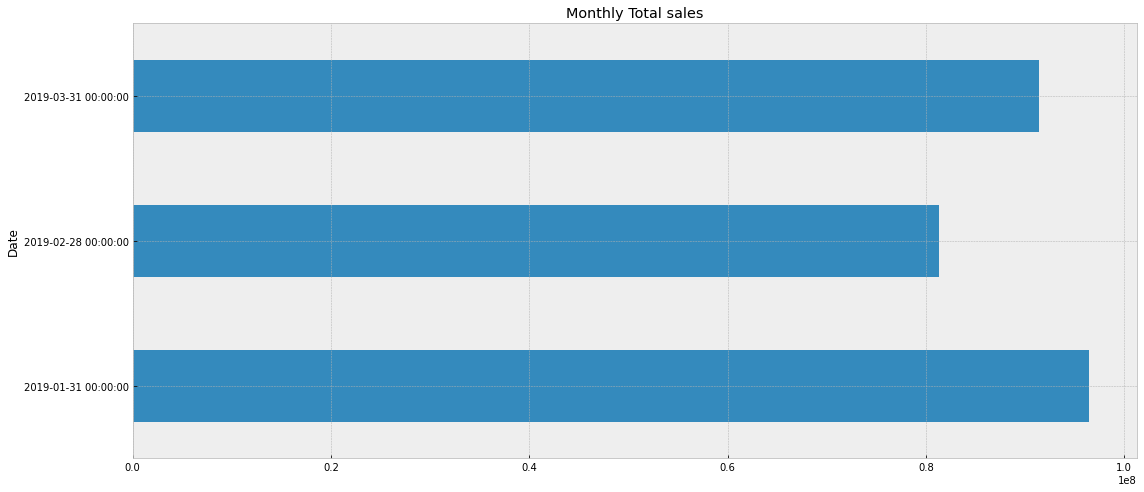

In [93]:
df.Total.resample('M').sum().plot(kind='barh')
plt.title('Monthly Total sales')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

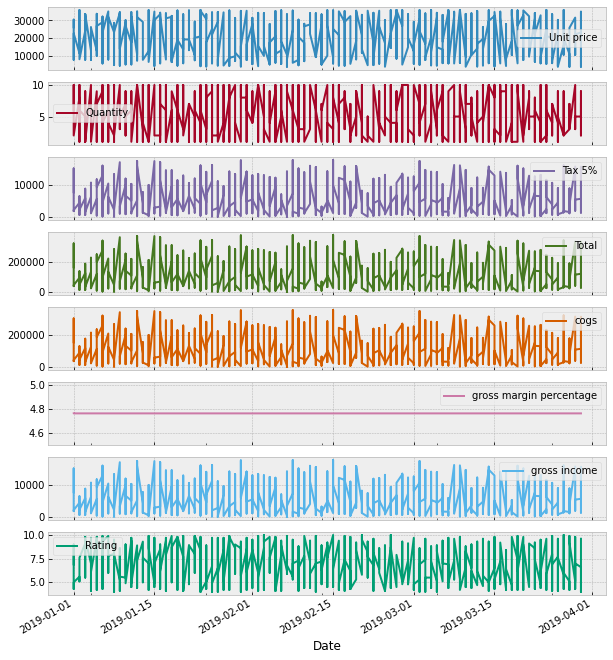

In [92]:
df.plot(subplots=True, figsize=(10,12))

# `M` means monthly frequency
# `W` means weekly frequency, 
# `B` means business day frequency
# `MS` means month start frequency

## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 